```python
print("Hello Python!")
```

```
You need not to install the tensorflow-gpu version in Google Colab explicitly. You can simply select Hardware accelerator = GPU and can use the tensorflow as GPU version in Google Colab.

Please follow this path to enable GPU mode in `Google Colab:

(Top Menu bar) Select Runtime -> Change runtime type -> Hardware accelerator -> Select GPU -> Save

Now run below code in Google Colab to check if GPU is enabled.

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))
Output:

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1

```

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')

print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
import tensorflow as tf

In [ ]:
#print tf versionersion
print(tf.__version__) #Tensorflow 2 comes up with a tight integration of Keras 

2.12.0


In [ ]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/A. Resources_ML/Learning Deep learning/5dayslive: Implementation of ANN ._krish_naik_./Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


here ```Exited``` is depending feature,Y

In [ ]:
## Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13] #all the row but 3 to 13 columns
y = dataset.iloc[:,13:]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
y = dataset.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

here dataset is not that clean, there are categorical columns, 

#feature Enrineering

In [ ]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography #converted into one hot encoded, with  unique values into clumns
#instead of showing all the three columns , it just show the two columns
#bcz if we knpw info about two, we can easily get info about the third one.

gender = pd.get_dummies(X['Gender'], drop_first = True)





In [ ]:
#concatenate these variables with dataframe
X = X.drop(['Geography', 'Gender'], axis=1) #axis=1 , bcz I need to drop the column

In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#spliting the dataset into training set and Test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)


#feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
#why not minmaxscaler?
# actually this is usually used in CNN, description later will be given
#standard scaler is based on z-score, it is good, but not for CNN
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

ANN prblm can ber solved using the ML

In [ ]:
X_train.shape

(8000, 11)

#Lets Create ANN

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,  ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
## lets initialize the ANN
classifier =  Sequential()

In [ ]:
## Adding the input Layer
#in our dataset , there are 11 inputs
#so in input layer , I need to have 11 nodes.
classifier.add(Dense(units=11, activation = 'relu'))
#units --> how many nodes we need
#activation funciotn will applied to next layer

In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=6, activation = 'relu'))



In [ ]:
## Adding second hidden layer
classifier.add(Dense(units=6, activation = 'relu'))

In [ ]:
##Adding output layer
classifier.add(Dense(1, activation = 'sigmoid'))

now my neural network is ready, and able to train this

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

by default adam uses a learning rate of 0.01

```python
#if i want to provide my own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
```


early stop:


In [ ]:
import tensorflow as tf
early_stoping  = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

#Stop training when a monitored metric has stopped improving.

In [ ]:
from keras.api._v2.keras import callbacks
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks = early_stoping)

Epoch 1/1000
536/536 [==============================] - 10s 5ms/step - loss: 0.5508 - accuracy: 0.7378 - val_loss: 0.4447 - val_accuracy: 0.8095
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4120 - accuracy: 0.8266 - val_loss: 0.4022 - val_accuracy: 0.8304
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3790 - accuracy: 0.8474 - val_loss: 0.3781 - val_accuracy: 0.8440
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3604 - accuracy: 0.8543 - val_loss: 0.3711 - val_accuracy: 0.8463
Epoch 5/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3538 - accuracy: 0.8569 - val_loss: 0.3642 - val_accuracy: 0.8501
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3491 - accuracy: 0.8589 - val_loss: 0.3636 - val_accuracy: 0.8504
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.8604 - val_loss: 0.3632 - val_accuracy

```
Certainly! Here's a summary of the key points regarding the batch size, the number of training samples, and the validation split:

Batch size: In the context of neural network training, the batch size refers to the number of training examples processed together in one forward and backward pass. It determines the number of samples processed simultaneously during each iteration.

Number of training samples: The total number of training samples refers to the size of your training dataset, typically represented as the number of rows in your input data. In your case, you mentioned having 8000 training samples.

Validation split: The validation split is the proportion of training data set aside for validation during the training process. For example, a validation split of 0.33 (33%) means that approximately one-third of the training data is reserved for validation.

Relationship between the values: The number 536 in the training logs represents the number of training samples used in each epoch. It is determined by multiplying the total number of training samples by (1 - validation split). In your case, it would be 8000 * (1 - 0.33) ≈ 536.

Batch processing in each epoch: With a batch size of 10, during each epoch, the model processes the training data in batches of 10 samples at a time. The total number of training samples (536) is divided into batches of 10, resulting in approximately 53 complete batches in each epoch.

Forward and backward propagation: Each forward propagation step involves feeding a batch of 10 training samples through the neural network to compute the output. Subsequently, during the backward propagation step, the gradients are calculated and used to update the model's weights and biases.

Number of steps per epoch: Considering a batch size of 10 and a total of 53 complete batches, there will be 53 forward and backward propagation steps or iterations within each epoch.

I hope this summary helps you in making your note. Let me know if you need further assistance!
```

```
if i have 8000 samples, then after how many epoch whole dataset training will be done?

ChatGPT
To determine the number of epochs required for the entire dataset to be processed during training, you need to consider the batch size and the total number of training samples.

In your case, you mentioned having 8000 training samples. Let's assume you're using a batch size of 10, as in the code snippet you provided.

Number of training steps (batches) per epoch = Total training samples / Batch size

Number of training steps per epoch = 8000 / 10 = 800

Since each epoch consists of multiple training steps (batches), the number of epochs required for the entire dataset to be processed can be calculated as:

Number of epochs = Total number of training steps / Number of training steps per epoch

Number of epochs = Total number of training steps / 800

Given that you want to process the entire dataset, the total number of training steps is equal to the total number of training samples. Therefore:

Number of epochs = 8000 / 800 = 10

Hence, it would take approximately 10 epochs to train the model on the entire dataset of 8000 samples, assuming a batch size of 10.
```

```
The goal of training a machine learning model is to minimize the loss and maximize the accuracy on both the training and validation sets. However, it is important to monitor the validation metrics closely to ensure that the model is not overfitting. Overfitting occurs when the model performs well on the training data but fails to generalize to new, unseen data.

To determine if the model is overfitting, it is essential to observe the trend of the validation metrics relative to the training metrics. If the validation loss and accuracy start to worsen or plateau while the training loss and accuracy continue to improve, it may indicate overfitting. On the other hand, if both the training and validation metrics are improving together, it suggests that the model is learning and generalizing well.

```

we see at some point aour accuracy almost same,

we will put the idea of early stoping.

may people ask what number epoch we should use, ---> the solution is to use early stoping


when the accuracy not increasing at all, that time I will apply early stoping

wait until 100 epochs for this code to see waht is happend

validation split says ?

how many data u are going to validate?



In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt 

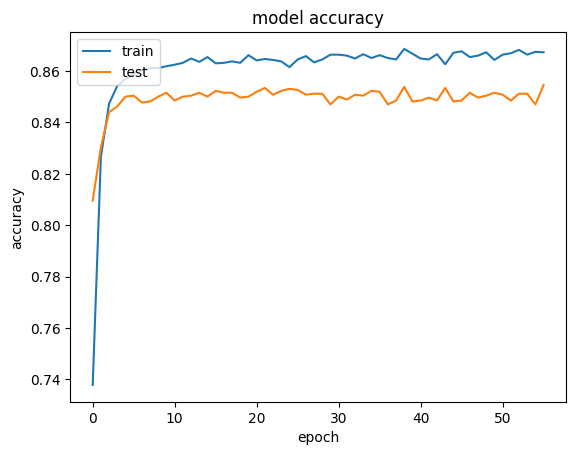

In [ ]:
#plot summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

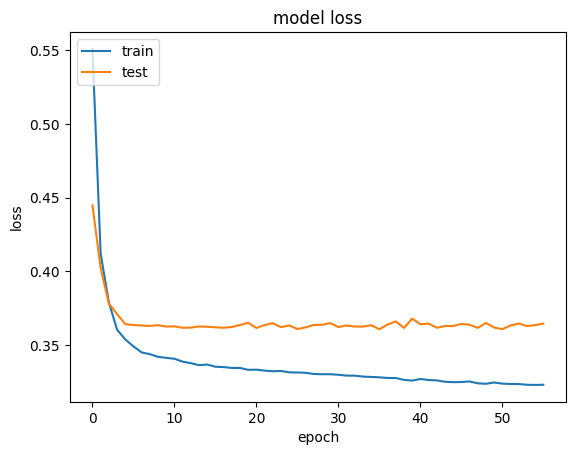

In [ ]:
#plot summary history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
#making predictions and evaluating the model

#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
#when it is >=0.5 I will take it as 1 , otherwise 0

63/63 [==============================] - 0s 2ms/step


y_pred = (y_pred > 0.5), performs a thresholding operation. It converts the predicted values into binary values based on a threshold of 0.5. If a predicted value is greater than or equal to 0.5, it is considered as 1; otherwise, it is considered as 0.

This thresholding step is commonly used when dealing with binary classification problems, where the task is to classify data into one of two classes (e.g., positive or negative, yes or no). By setting the threshold at 0.5, values above it are classified as one class (e.g., positive) and values below it are classified as the other class (e.g., negative).

After applying the threshold, the variable y_pred now contains the predicted class labels for the test set, where 1 represents the positive class and 0 represents the negative class.

By comparing these predicted labels (y_pred) with the true labels of the test set, you can evaluate the performance of the model. Common evaluation metrics for binary classification tasks include accuracy, precision, recall, and F1-score, among others.

It's important to note that the choice of the threshold can affect the performance evaluation. In some cases, it may be more appropriate to select a threshold based on specific requirements or domain knowledge, rather than using a fixed threshold like 0.5.

To evaluate the model's performance further, you can compare the predicted labels (y_pred) with the true labels of the test set and calculate various metrics to assess the model's accuracy and other aspects of its performance.

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1530,   65],
       [ 210,  195]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8625

In [ ]:
#get the weights
classifier.get_weights()

[array([[-0.40411353, -0.08696583, -0.18474586,  0.002187  ,  0.3228838 ,
          0.01212357,  0.17944446,  0.34559292,  0.31225502,  0.02075675,
         -0.2160126 ],
        [-0.7116672 , -0.52483934,  0.2731538 ,  0.15494545, -0.8430387 ,
         -0.70646656, -0.04141415, -0.0789443 ,  0.5816042 , -0.08792935,
         -0.8119443 ],
        [-0.27779853, -0.08857933, -0.48435047, -0.00176114, -0.07062471,
          0.05243158, -0.26157984,  0.26896048,  0.30134547,  0.15437755,
         -0.10512909],
        [ 0.27914318, -0.06842558,  0.2416349 ,  0.20022768, -0.16227293,
          0.29384133, -0.15691437,  0.35288754, -0.47412267, -0.5202928 ,
         -0.47506723],
        [-0.39953655,  0.62627226, -0.27345672,  1.0230085 , -0.3314819 ,
         -0.00781666, -0.79088914, -0.6442812 ,  0.12810078, -0.8553637 ,
          0.43047827],
        [ 0.6771071 ,  0.31097966, -0.21727306,  0.12746426,  0.08834857,
         -0.20388044,  0.33032086, -0.17955986,  0.39444536, -0.0717220

#how to add  a Dropout layer


In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=6, activation = 'relu'))
classifier.add(Dropout(0.2))


In [ ]:
## Adding second hidden layer
classifier.add(Dense(units=6, activation = 'relu'))
classifier.add(Dropout(0.2))